In [1]:
!pip install tensorboard

   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.8/5.5 MB 5.6 MB/s eta 0:00:01
   --------------- ------------------------ 2.1/5.5 MB 6.2 MB/s eta 0:00:01
   ---------------------------- ----------- 3.9/5.5 MB 6.9 MB/s eta 0:00:01
   ---------------------------------- ----- 4.7/5.5 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 5.5/5.5 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.6 MB ? eta -:--:--
   ------------- -------------------------- 1.6/4.6 MB 7.6 MB/s eta 0:00:01
   ------------------------ --------------- 2.9/4.6 MB 7.3 MB/s eta 0:00:01
   -------------------------------------- - 4.5/4.6 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 4.6/4.6 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typi

In [12]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import glob
import os

folder_path = "D:/VA/coding/project/cect/results/resnet503plus/attn_CBAM/model/CECT/Res50Unet3plus_attn_1/unet3plus_resnet_attn/log"

log_files = glob.glob(os.path.join(folder_path, "events.out.tfevents.*"))

# Load the event/log file
ea = event_accumulator.EventAccumulator(str(log_files[0]))
ea.Reload()

In [13]:
tags = ea.Tags()["scalars"]
print(tags)

['info/lr', 'info/total_loss', 'info/loss_ce', 'info/loss_dice', 'info/val_dice', 'info/val_hd95', 'info/val_iou', 'info/val_acc', 'info/val_prec', 'info/val_sens', 'info/val_spec']


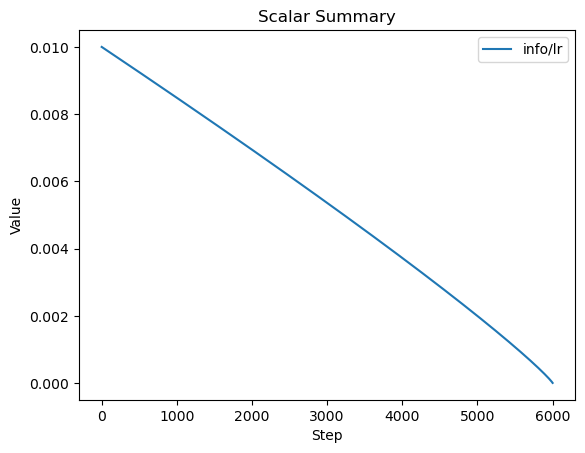

In [14]:
# Plot example scalar tag
for tag in tags:
    if tag == "info/lr":
        events = ea.Scalars(tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]
        plt.plot(steps, values, label=tag)

plt.xlabel("Step")
plt.ylabel("Value")
plt.legend()
plt.title("Scalar Summary")
plt.show()

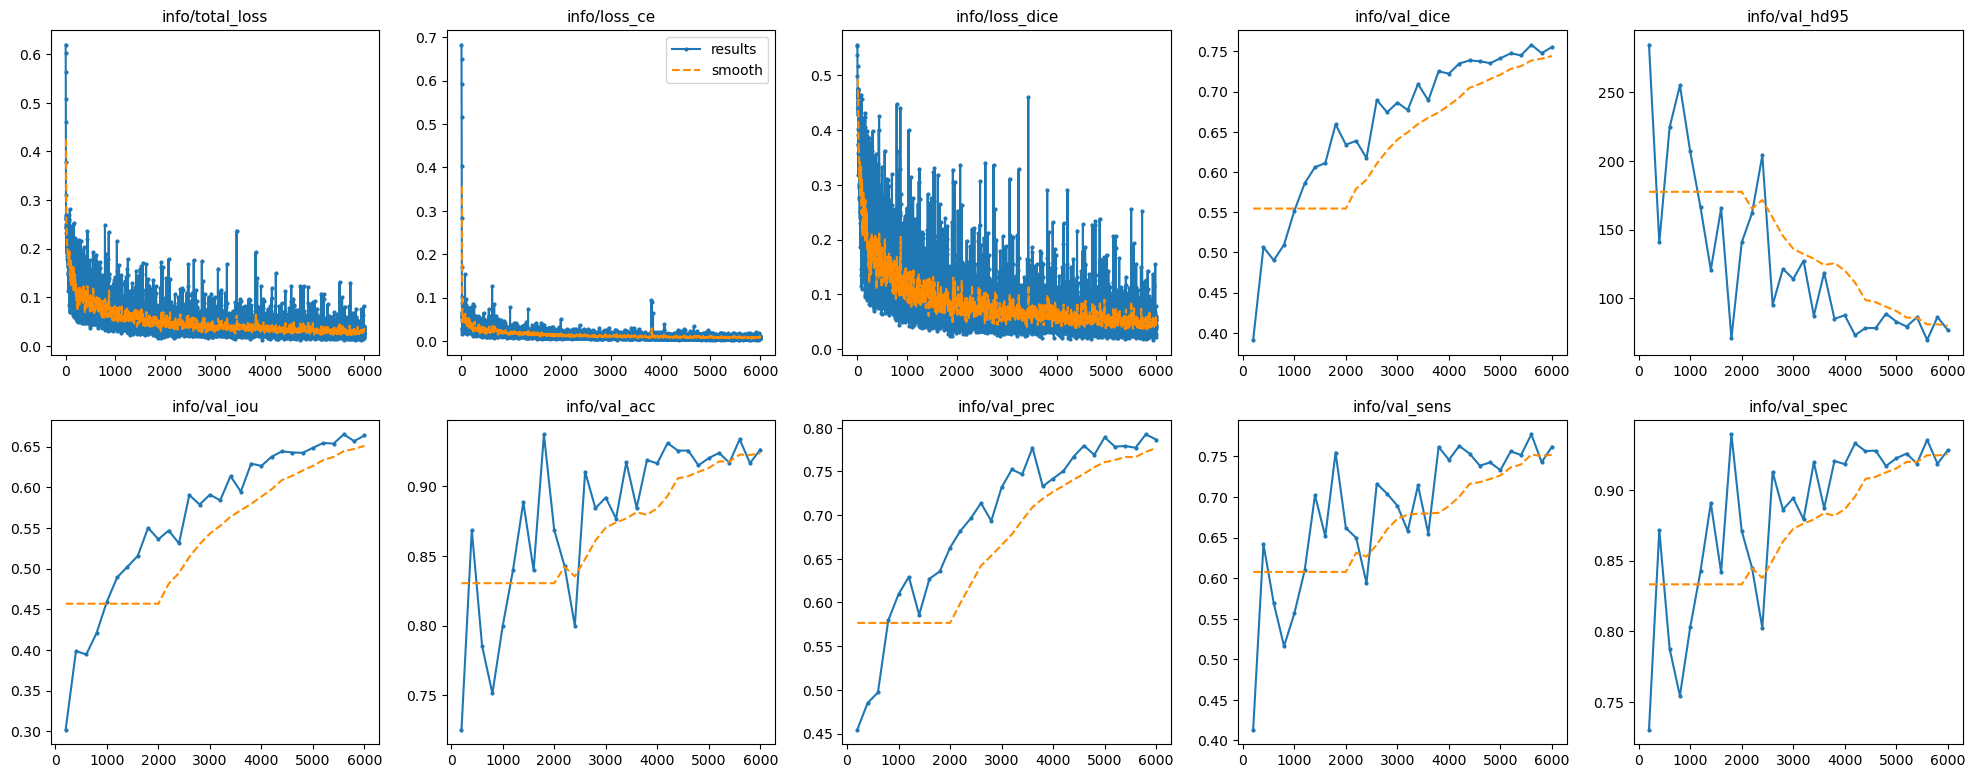

In [15]:
import numpy as np

N_ROWS = 2
N_COLS = 5

# 2. Create the figure and the grid of axes
# Adjust figsize for a good aspect ratio
fig, axes = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(20, 8)) 

# Flatten the 2D array of axes for easy iteration (axes[0], axes[1], ...)
axes = axes.flatten() 

# 3. Define a function for smoothing (Simple Moving Average)
def smooth_data(values, window_size=10):
    """Calculates a Simple Moving Average for smoothing."""
    if len(values) < window_size:
        return values # Not enough data to smooth
    
    # Calculate SMA
    weights = np.repeat(1.0, window_size) / window_size
    smoothed = np.convolve(values, weights, 'valid')
    
    # Pad the smoothed array to match the original length for consistent plotting
    padding = [smoothed[0]] * (window_size - 1)
    return np.concatenate((padding, smoothed))

# 4. Iterate and plot each tag onto its respective axis
for i, tag in enumerate(tags[1::]):
    ax = axes[i]  # Get the current axis object
    
    # Check if the tag exists in the loaded data
    if tag not in ea.Tags().get("scalars", []):
        ax.set_title(f"Tag not found: {tag}", fontsize=10, color='red')
        continue # Skip this plot if the data is missing

    # --- Your Data Retrieval Logic ---
    events = ea.Scalars(tag)
    steps = [e.step for e in events]
    values = [e.value for e in events]
    # ---------------------------------
    
    # Plot 1: The 'results' (raw data) line with markers
    ax.plot(steps, values, marker='.', linestyle='-', markersize=4, label='results', color='C0')
    
    # Plot 2: The 'smooth' line (approximated)
    smoothed_values = smooth_data(values, window_size=10) # Window size of 10 is a good default
    ax.plot(steps, smoothed_values, linestyle='--', color='darkorange', label='smooth')
    
    # Set the title for the subplot
    ax.set_title(tag, fontsize=11)
    
    # Add the legend only to the second plot in the first row
    if i == 1:
        ax.legend(loc='upper right')

# Spacing between subplots
plt.tight_layout(pad=1.5)
plt.show()